## **Ex4 imgae classification**

In [ ]:
pip install scikeras

In [ ]:
from keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
import numpy as np
import os
import tensorflow as tf
import pandas as pd
import cv2
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
# unzip the file containing the images
!unzip '/content/Faces.zip'

In [ ]:
import os

# path to the images files
folder_path = '/content/NoSunglasses'
# Get all files in the folder
files = os.listdir(folder_path)
# Get the full path of each file
nosun_paths = [os.path.join(folder_path, file) for file in files]


# path to the images files
folder_path = '/content/Sunglassess'
# Get all files in the folder
files = os.listdir(folder_path)
# Get the full path of each file
sun_paths = [os.path.join(folder_path, file) for file in files]



In [ ]:
import numpy as np
import os
import tensorflow as tf
import pandas as pd
import cv2
IMG_WIDTH=32
IMG_HEIGHT=30

img_data=[]
class_name=[]

# Extract the image array and class name
for path in [nosun_paths, sun_paths]:
  for file in path:
    image = cv2.imread(file, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),
    interpolation = cv2.INTER_AREA)
    image = np.array(image)
    image = image.astype('float32')
    image /= 255
    img_data.append(image)
    class_name.append(str(path))

target_dict={k: v for v, k in enumerate(np.unique(class_name))}
# Convert the class_names to their respective numeric value based on the dictionary
target_val = [target_dict[class_name[i]] for i in range(len(class_name))]
# Convert to X - a 3d array (samples, width, height) and y - 0/1
X = tf.cast(np.array(img_data), tf.float64)
y = tf.cast(list(map(int,target_val)),tf.int32)

In [ ]:
data = np.array(X)
labels = np.array(y)

In [ ]:
# image size
data[0].shape

(32, 30)

In [ ]:
from sklearn.model_selection import train_test_split
# splitting the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

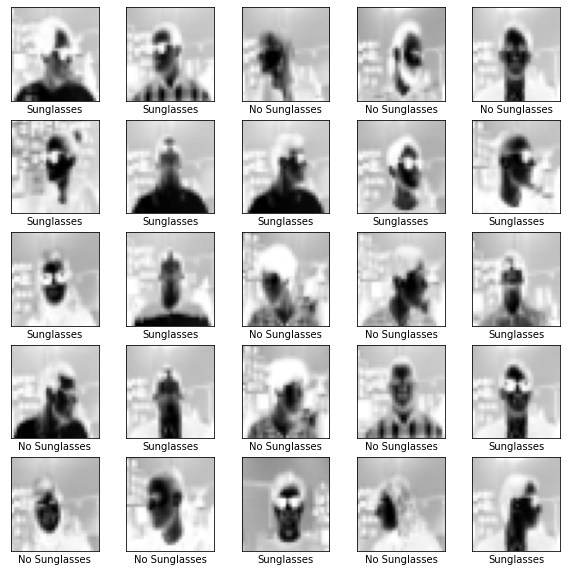

In [ ]:
# Verify data
class_names = ['No Sunglasses', 'Sunglasses']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [ ]:
import numpy as np
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int32), array([241, 258]))

In [ ]:
# Create convolutional base
def create_cnn_with_classifier():
  model = models.Sequential()
  model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 30, 1)))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))
  # Compile and train the model
  model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])
  
  return model

In [ ]:
# Create convolutional base
def create_cnn():
  model = models.Sequential()
  model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 30, 1)))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))
  
  return model

##**CNN models with optimizer ADAM with different batch sizes and epochs**

In [ ]:
# create model
model = KerasClassifier(model=create_cnn_with_classifier, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 40, 50, 60]
epochs = [5, 10, 20, 30]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, y_train)

In [ ]:
# summarize results

print("best accuracy:" + str(grid_result.best_score_) + " using:" + str(grid_result.best_params_))

best accuracy:0.9479595026813842 using:{'batch_size': 10, 'epochs': 30}


In [ ]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Accuracy: %f, STD: %f with: %r" % (mean, stdev, param))

Accuracy: 0.879831, STD: 0.038753 with: {'batch_size': 10, 'epochs': 5}
Accuracy: 0.915927, STD: 0.035110 with: {'batch_size': 10, 'epochs': 10}
Accuracy: 0.937943, STD: 0.024981 with: {'batch_size': 10, 'epochs': 20}
Accuracy: 0.947960, STD: 0.023012 with: {'batch_size': 10, 'epochs': 30}
Accuracy: 0.817774, STD: 0.051919 with: {'batch_size': 20, 'epochs': 5}
Accuracy: 0.899851, STD: 0.018268 with: {'batch_size': 20, 'epochs': 10}
Accuracy: 0.943955, STD: 0.024009 with: {'batch_size': 20, 'epochs': 20}
Accuracy: 0.937931, STD: 0.019623 with: {'batch_size': 20, 'epochs': 30}
Accuracy: 0.781726, STD: 0.057838 with: {'batch_size': 40, 'epochs': 5}
Accuracy: 0.873783, STD: 0.025356 with: {'batch_size': 40, 'epochs': 10}
Accuracy: 0.907847, STD: 0.012098 with: {'batch_size': 40, 'epochs': 20}
Accuracy: 0.921927, STD: 0.034136 with: {'batch_size': 40, 'epochs': 30}
Accuracy: 0.783662, STD: 0.034751 with: {'batch_size': 50, 'epochs': 5}
Accuracy: 0.849806, STD: 0.038473 with: {'batch_size': 

##**CNN models with different optimizers**

In [ ]:
# create model
model = KerasClassifier(model=create_cnn , loss="binary_crossentropy", epochs=30, batch_size=10, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, y_train)

In [ ]:
# summarize results

print("best accuracy:" + str(grid_result.best_score_) + " using:" + str(grid_result.best_params_))

best accuracy:0.9479234302479379 using:{'optimizer': 'Adam'}


In [ ]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Accuracy: %f, STD: %f with: %r" % (mean, stdev, param))

Accuracy: 0.641308, STD: 0.028474 with: {'optimizer': 'SGD'}
Accuracy: 0.939891, STD: 0.012954 with: {'optimizer': 'RMSprop'}
Accuracy: 0.538994, STD: 0.029588 with: {'optimizer': 'Adagrad'}
Accuracy: 0.484910, STD: 0.053583 with: {'optimizer': 'Adadelta'}
Accuracy: 0.947923, STD: 0.010058 with: {'optimizer': 'Adam'}
Accuracy: 0.923899, STD: 0.019610 with: {'optimizer': 'Adamax'}
Accuracy: 0.941923, STD: 0.017092 with: {'optimizer': 'Nadam'}


##**Evaluation metrics**

In [ ]:
# Creating the best model according our results
model = KerasClassifier(model=create_cnn_with_classifier, epochs=30, batch_size=10, verbose=0)
# Training the model on the train data
model.fit(x_train, y_train)

KerasClassifier(
	model=<function create_cnn_with_classifier at 0x7fef877fcaf0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=10
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=30
	class_weight=None
)

In [ ]:
# Predict the labels of the test set
y_pred = model.predict(x_test)

In [ ]:
# Printing a Classification report for the test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        72
           1       0.98      1.00      0.99        53

    accuracy                           0.99       125
   macro avg       0.99      0.99      0.99       125
weighted avg       0.99      0.99      0.99       125



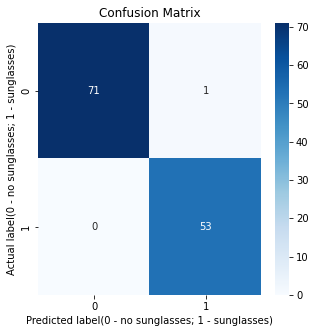

In [ ]:
# Creating Confusion Matrix
mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(15, 15))
fig.set_size_inches(5, 5)
sns.heatmap(mat, annot=True, cmap='Blues',fmt='.0f')
plt.title("Confusion Matrix")
plt.ylabel('Actual label(0 - no sunglasses; 1 - sunglasses)')
plt.xlabel('Predicted label(0 - no sunglasses; 1 - sunglasses)')

plt.show()

In [ ]:
history = create_cnn_with_classifier().fit(x_train, y_train, epochs=30, batch_size=10,validation_data=(x_test, y_test))

Epoch 1/30
50/50 [==============================] - 2s 28ms/step - loss: 0.6820 - accuracy: 0.5371 - val_loss: 0.6405 - val_accuracy: 0.6320
Epoch 2/30
50/50 [==============================] - 1s 26ms/step - loss: 0.5248 - accuracy: 0.7475 - val_loss: 0.4709 - val_accuracy: 0.7920
Epoch 3/30
50/50 [==============================] - 1s 23ms/step - loss: 0.3925 - accuracy: 0.8236 - val_loss: 0.3344 - val_accuracy: 0.8720
Epoch 4/30
50/50 [==============================] - 1s 20ms/step - loss: 0.2738 - accuracy: 0.8958 - val_loss: 0.2468 - val_accuracy: 0.8880
Epoch 5/30
50/50 [==============================] - 1s 19ms/step - loss: 0.2483 - accuracy: 0.9038 - val_loss: 0.2008 - val_accuracy: 0.9040
Epoch 6/30
50/50 [==============================] - 1s 19ms/step - loss: 0.1697 - accuracy: 0.9419 - val_loss: 0.1811 - val_accuracy: 0.9200
Epoch 7/30
50/50 [==============================] - 1s 21ms/step - loss: 0.1319 - accuracy: 0.9559 - val_loss: 0.1632 - val_accuracy: 0.9440
Epoch 8/30
50

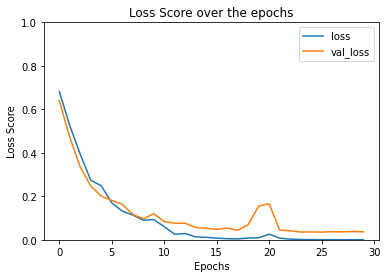

In [ ]:
# Plot showing the Loss Score over the epochs
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Score')
plt.title('Loss Score over the epochs')
plt.ylim([0, 1])
plt.legend(loc='upper right')

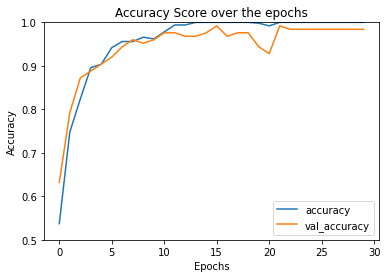

In [ ]:
# Plot showing the Accuracy over the epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Score over the epochs')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

##**Questions for this exercise:**
###**1. Does the model overfit?**
As we can see, from the learning curve plot of the error "cross entropy" the training error and the testaing error are getting lower as epochs grow and they are converging from epoch ~15, and the validation set stays pretty parralel and doesnt diverge. 

In addition, the model performance on the test set is similar to the train set. Also, we made accuracy plot and we see that on the training set is high, but it does not overfit because the validation loss plot also drops to a stability point and has a small gap with training loss.

###**2. What's the effect of batch size? In general, do you see this effect in the current task?**
The batch size in a CNN model determines the number of samples that will be processed before the model's weights are updated. If we use large batch size, we can lead to more stable results and better performance, in despite of, the speed of training times. Also, we need more memory.

In small batch size we need not a a lot of memory, but we can get to more noisy in our results and the results became less accurate with more errors. But, the speed of returning the results is faster.

In the current task, we can see that the grid search chose the lowest batch size, because the model was more sensitive to each result. More results case to divergence to be low and the pictures will not be so different with or without the sunglassesss.

###**3. What was the optimal optimizer? Explain.**
The optimal optimizer is Adam Optimizer because it performs better than other optimizers we tested for accuracy and "cross entropy" loss score. Adam is algoritm that combine of some algoritm from OpenAI:

First, Adaptive Gradient Algorithm (AdaGrad) that maintains a per-parameter learning rate that improves performance on problems with sparse gradients (e.g. natural language and computer vision problems).

Second, Root Mean Square Propagation (RMSProp) that also maintains per-parameter learning rates that are adapted based on the average of recent magnitudes of the gradients for the weight (e.g. how quickly it is changing). 
From here, this means the algorithm does well on online and non-stationary problems. 

In conclusion, Adam realizes the benefits of both AdaGrad and RMSProp.

The Adam optimization algorithm is an extension to stochastic gradient descent that has recently seen broader adoption for deep learning applications in computer vision and natural language processing.

